<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Black_Litterman_Portfolio_Allocation_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Wrangle

In [ ]:
!pip install yfinance

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [ ]:
#Create a Portfolio
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'XOM',
    'UNH',
    'JNJ',
    'V',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'F',
    'MAR',
    'O',
    'HSY'
]

In [ ]:
#Get the stock data
portfolio = yf.download(symbols, start="2018-01-01", end="2022-12-31")['Adj Close']

portfolio.head()

[*********************100%***********************]  20 of 20 completed


,AAPL,ABBV,AMZN,CAT,DIS,F,HD,HSY,JNJ,KO,LMT,MAR,META,MSFT,O,T,UNH,UPS,V,XOM
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,40.831589,75.741005,59.450500,136.692078,108.726059,9.644666,164.704376,99.656075,120.209465,38.256844,275.557129,128.265472,181.419998,80.562050,42.884052,18.403522,203.987350,104.181763,110.172302,64.321701
2018-01-03,40.824478,76.926262,60.209999,136.900986,109.192848,9.720847,165.562805,99.238289,121.357742,38.172825,277.866852,130.854736,184.669998,80.936966,42.770447,17.978531,206.127167,106.489990,111.269127,65.584969
2018-01-04,41.014103,76.487556,60.479500,138.781128,109.144241,9.888451,166.876678,99.931648,121.349144,38.710491,282.633392,130.135483,184.330002,81.649300,41.846420,18.145660,207.021866,107.180779,111.682838,65.675758
2018-01-05,41.481075,77.819046,61.457001,140.974579,108.551003,10.056051,168.619858,100.411644,122.350639,38.702084,285.194000,128.888794,186.850006,82.661636,41.816139,18.212513,210.969498,107.509308,114.357559,65.622810
2018-01-08,41.326988,76.572227,62.343498,144.517242,106.994995,10.017959,168.216873,101.389450,122.506096,38.643269,283.879089,130.749252,188.279999,82.745987,41.869141,18.265039,207.307800,108.815033,114.819374,65.917824


In [ ]:
#SP500 ETF Benchmark
market_prices = yf.download("SPY", start='2018-01-01', end='2022-12-31')["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2018-01-02    244.918686
2018-01-03    246.467819
2018-01-04    247.506607
2018-01-05    249.156021
2018-01-08    249.611633
Name: Adj Close, dtype: float64

In [ ]:
#Grap Market Capitalization for each stock in portfolio
mcaps = {}
for t in symbols:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 2799236808704,
 'MSFT': 2401142571008,
 'META': 783529017344,
 'AMZN': 1421680967680,
 'XOM': 445212983296,
 'UNH': 468756004864,
 'JNJ': 447423348736,
 'V': 502991126528,
 'HD': 331172151296,
 'ABBV': 267184095232,
 'KO': 263453392896,
 'DIS': 167673053184,
 'T': 101301329920,
 'UPS': 154925858816,
 'LMT': 113336541184,
 'CAT': 146549325824,
 'F': 48649363456,
 'MAR': 63215935488,
 'O': 39578722304,
 'HSY': 45742452736}

## Step 2: Getting Priors

In [ ]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

1.9618067215749169

<Axes: >

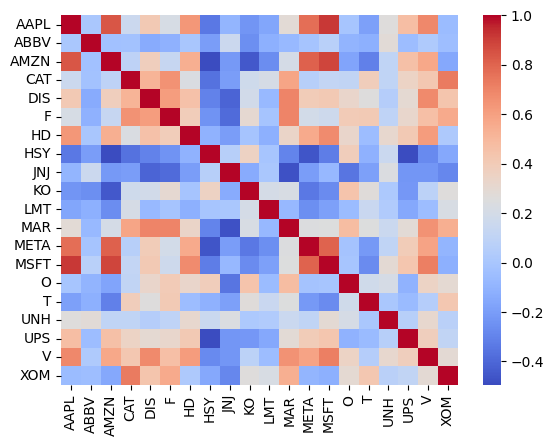

In [ ]:
#Visualize the Covariant Correlation  (Shirnkage)
sns.heatmap(S.corr(), cmap='coolwarm')

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior
'''
implied_prior_returns
시장 가중치에 의해 내포된 수익률의 사전 추정치를 계산합니다.
즉, 시장 포트폴리오의 위험에 대한 각 자산의 기여를 고려할 때,
우리는 얼마나 보상받을 것으로 예상합니까? '''

'''mcaps: 모든 자산의 시가총액
delta: 위험 회피 파라미터
S: 자산 수익률의 공분산 행렬'''

AAPL    0.168035
ABBV    0.086282
AMZN    0.158599
CAT     0.109038
DIS     0.117570
F       0.119668
HD      0.119138
HSY     0.067394
JNJ     0.073558
KO      0.076406
LMT     0.080331
MAR     0.119604
META    0.171254
MSFT    0.159448
O       0.092353
T       0.077413
UNH     0.109256
UPS     0.104523
V       0.130820
XOM     0.096807
dtype: float64

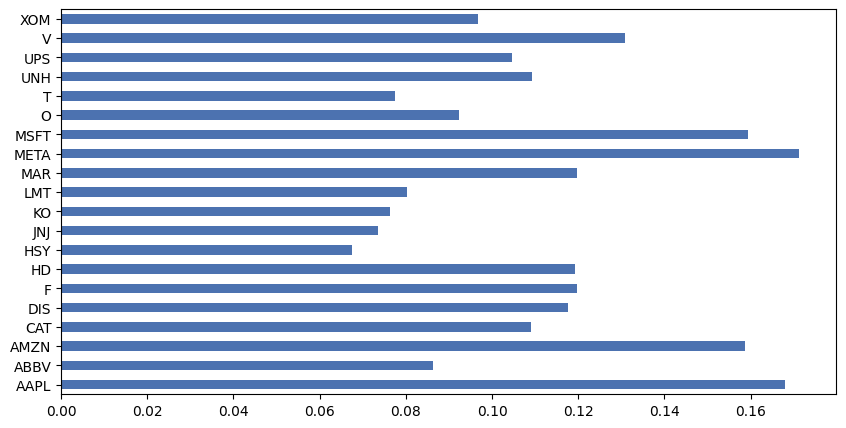

In [ ]:
#What am I looking at here?
market_prior.plot.barh(figsize=(10,5));

## Step 3: Integrating Views

In [ ]:
#You don't have to provide views on all the assets (random now,
# you know what areyou views on this stock and where do you think it's going to move )
'''views = 투자자가 가지고 있는 전망 정도로 생각
필요시 input을 변경해가며 모델 최적화된 결과 도출'''

viewdict = {
    'AAPL':0.10,
    'MSFT':0.10,
    'META':0.05,
    'AMZN':0.30,
    'XOM':0.02,
    'UNH':0.01,
    'JNJ':0.15,
    'V':0.09,
    'HD':0.16,
    'ABBV':0.07,
    'KO':0.01,
    'DIS':-0.23, #negative
    'T':0.16,
    'UPS':0.10,
    'LMT':-0.09,
    'CAT':0.30,
    'F':0.16,
    'MAR':-0.08,
    'O':0.30,
    'HSY':-0.26
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)
'''
BlackLittermanModel
pi="market"인 경우, 시장 점유율을 계산합니다(시장 점유율_이전)
통과됨).
absolute_views=자산의 부분 집합에 대한 K개의 절대 뷰 모음,'''


### Creating Confidences

we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
]

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances) # a diode diagonal array

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


# Step 4: Calculate Posterior Estimate Returns

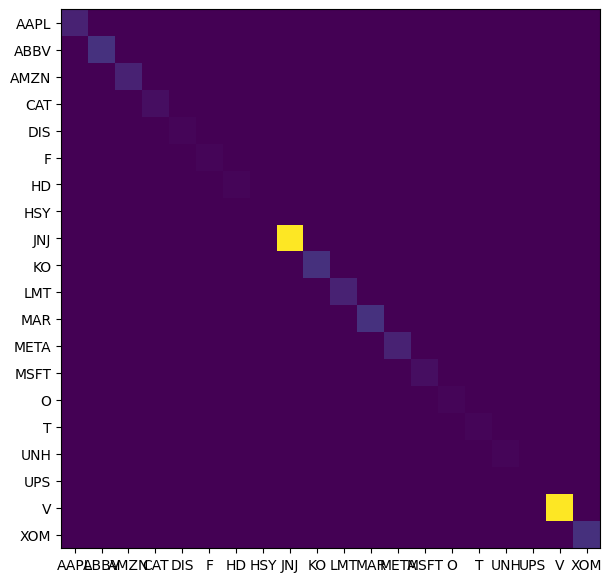

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

AAPL    0.142958
ABBV    0.063454
AMZN    0.194544
CAT     0.186529
DIS     0.042496
F       0.127907
HD      0.091262
HSY     0.008765
JNJ     0.082498
KO      0.031936
LMT    -0.008149
MAR    -0.064911
META    0.136019
MSFT    0.139842
O       0.001687
T       0.059209
UNH     0.043171
UPS     0.100444
V       0.086349
XOM     0.043571
dtype: float64

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.168035,0.142958,0.10
ABBV,0.086282,0.063454,0.07
AMZN,0.158599,0.194544,0.30
CAT,0.109038,0.186529,0.30
DIS,0.117570,0.042496,-0.23
F,0.119668,0.127907,0.16
HD,0.119138,0.091262,0.16
HSY,0.067394,0.008765,-0.26
JNJ,0.073558,0.082498,0.15
KO,0.076406,0.031936,0.01


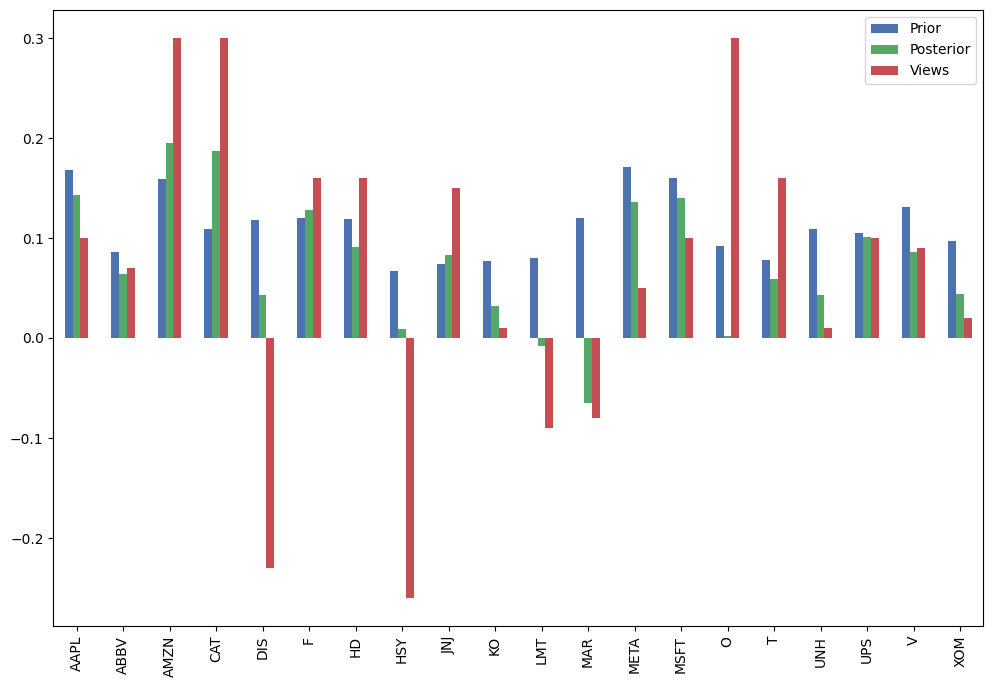

In [ ]:
rets_df.plot.bar(figsize=(12,8));

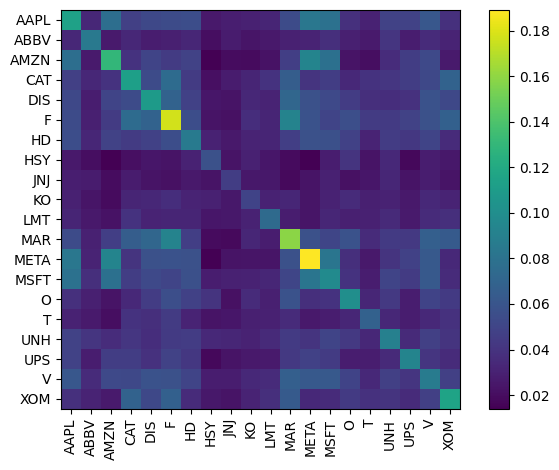

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

# Step 5: Portfolio Allocation

In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.10572),
             ('ABBV', 0.02787),
             ('AMZN', 0.17546),
             ('CAT', 0.17502),
             ('DIS', 0.0),
             ('F', 0.08687),
             ('HD', 0.04937),
             ('HSY', 0.0),
             ('JNJ', 0.06077),
             ('KO', 0.0),
             ('LMT', 0.0),
             ('MAR', 0.0),
             ('META', 0.088),
             ('MSFT', 0.10352),
             ('O', 0.0),
             ('T', 0.02335),
             ('UNH', 0.0),
             ('UPS', 0.0654),
             ('V', 0.03866),
             ('XOM', 0.0)])

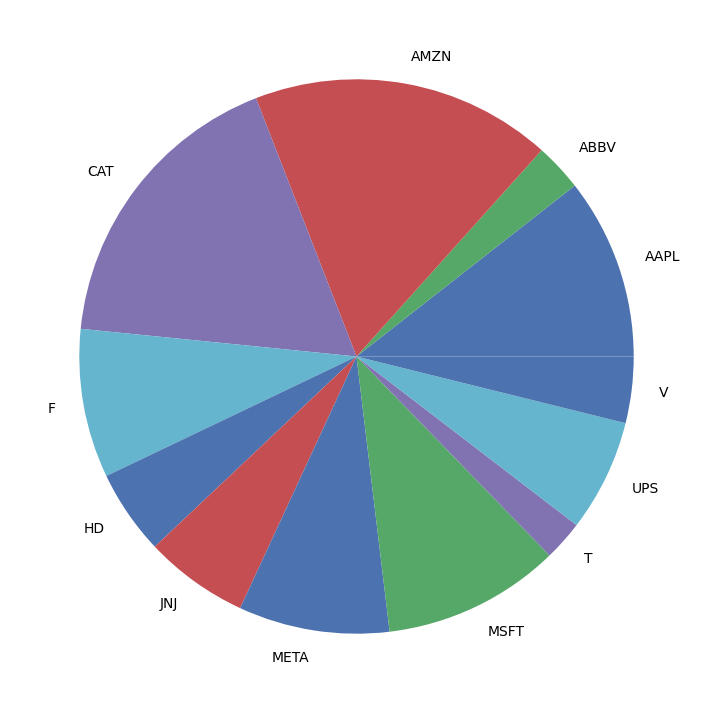

In [ ]:
pd.Series(weights).plot.pie(figsize=(9,9));

Expected annual return: 14.2%
Annual volatility: 24.1%
Sharpe Ratio: 0.51


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.1420278243143249, 0.24144286096377282, 0.5054107784642036)

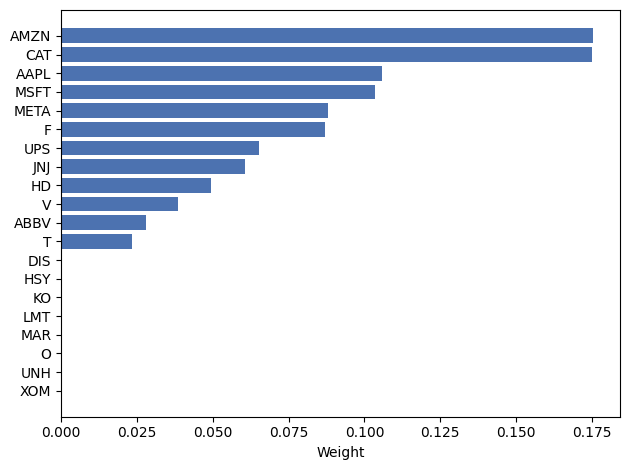

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [ ]:
from pypfopt.discrete_allocation import get_latest_prices
latest_prices = get_latest_prices(portfolio)

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 50.7 MB/s eta 0:00:00


In [ ]:
da = DiscreteAllocation(weights, latest_prices=latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation: ", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation:  {'AAPL': 12, 'ABBV': 3, 'AMZN': 31, 'CAT': 11, 'F': 122, 'HD': 2, 'JNJ': 5, 'META': 11, 'MSFT': 7, 'T': 19, 'UPS': 6, 'V': 3}
Funds remaining: $5.48
